In [6]:
import pandas as pd
import numpy as np
# Load the CSV file
data = pd.read_csv("sign_mnist_test.csv")

# Display the first few rows
print(data.head())

# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Check the distribution of classes
print("Unique classes and their counts:")
print(data['label'].value_counts())

# Determine the number of unique classes
num_classes = data['label'].nunique()
print(f"Number of unique classes: {num_classes}")


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Separate features and labels
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Normalize the pixel values to be between 0 and 1
X = X / 255.0

# Reshape the data to match the input shape of CNN
X = X.reshape(-1, 28, 28, 1)

# One-hot encode the labels
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(24, activation='softmax')  # Updated to 24 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Re-run the training
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.1681 - loss: 2.8566 - val_accuracy: 0.7408 - val_loss: 0.9685
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8107 - loss: 0.6318 - val_accuracy: 0.9763 - val_loss: 0.1409
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9745 - loss: 0.1056 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9987 - loss: 0.0177 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 1.0000 - loss: 0.0010 - val_ac

In [35]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 6.5496e-04
Validation accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


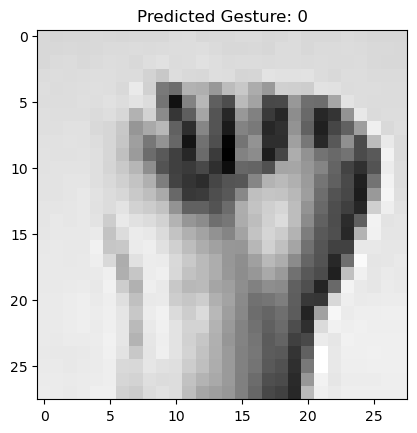

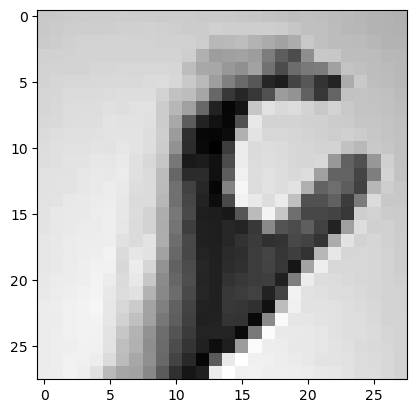

In [39]:
import matplotlib.pyplot as plt

# Predict on a sample image from the validation set
sample_image = X_val[0].reshape(1, 28, 28, 1)
prediction = model.predict(sample_image)
predicted_label = lb.inverse_transform(prediction)[0]

# Display the image with the predicted label
plt.imshow(X_val[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Gesture: {predicted_label}")
plt.show()
plt.imshow(X_val[5].reshape(28, 28), cmap='gray')